In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
data_dir = "/home/ucsd-train25/scratch/projects/atlas_full/processed_files/"

Load in TSNE dataframe with a x and y plotting coordinates

In [32]:
tsne_df = pd.read_csv("/home/ucsd-train25/scratch/projects/atlas_full/"\
                      "processed_files/tpm_all_vg_0.05_zscores_pca20_tSNEdf.csv", index_col=0)
tsne_df.head()

,x,y,community_500,community_300,community_100,batch,celltype
index,,,,,,,
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,39.302770,-50.858334,0,4,4,B1,Enterocyte.Immature.Distal
B1_AAACCGTGCCAAGT_Tuft,6.580037,-61.769756,0,8,8,B1,Tuft
B1_AAACGCACAGCCTA_Goblet,-8.786306,-58.158936,7,7,9,B1,Goblet
B1_AAACGCACCAGATC_Endocrine,7.341705,-54.548725,0,4,4,B1,Endocrine
B1_AAACGCACCGCCTT_Stem,10.150571,-67.295890,0,8,8,B1,Stem


Read in the original expression matrix

In [33]:
log2_tpm = pd.read_csv("/home/ucsd-train25/cshl_2018/atlas1_full_counts/log2_tpm_all.csv", index_col=0)
print(log2_tpm.shape)
log2_tpm.head()

(15971, 7216)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
Mrpl15,2.095539,2.128894,1.805554,1.710949,0.0,2.514271,0.0,1.546211,1.996544,0.0,...,2.152732,1.463345,0.0,0.000000,0.0,3.304177,0.0,0.0,3.584004,1.547524
Lypla1,2.095539,0.000000,0.000000,1.095506,0.0,0.000000,0.0,0.000000,0.805381,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.798929,0.0,0.0,0.000000,0.469501
Gm37988,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Tcea1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Atp6v1h,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.909761,0.0,1.624288,0.0,1.310118,0.0,0.0,0.000000,0.469501


In [40]:
gene_of_interest = 'Tff3'

In [41]:
gene_values = pd.DataFrame(log2_tpm.loc[gene_of_interest])
gene_values.head()

,Tff3
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,1.398859
B1_AAACCGTGCCAAGT_Tuft,5.118451
B1_AAACGCACAGCCTA_Goblet,7.235899
B1_AAACGCACCAGATC_Endocrine,2.140988
B1_AAACGCACCGCCTT_Stem,0.000000


In [42]:
gene_of_interest_bins = pd.cut(log2_tpm.loc[gene_of_interest], 10, labels = ['0','1','2','3','4','5','6','7','8','9'])
tsne_df[gene_of_interest] = gene_of_interest_bins

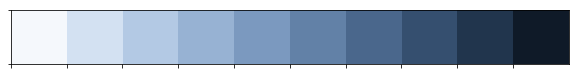

In [43]:
g_color = sns.cubehelix_palette(10, start=2.75, rot=0, dark=0.1, light=.97, reverse=False)
sns.palplot(g_color)


Text(0.5,1,'expression of Tff3')

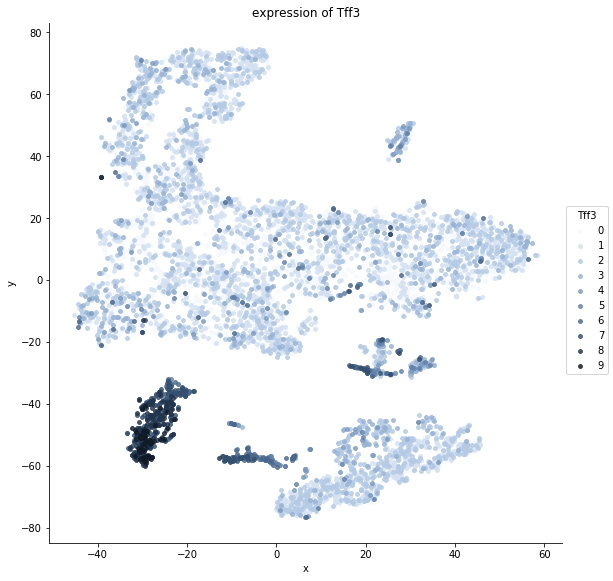

In [45]:
sns.lmplot('x','y',tsne_df, hue = gene_of_interest, fit_reg=False, 
              scatter_kws={"s":15}, size=8, palette = g_color)
plt.title("expression of {}".format(gene_of_interest))

Get bins of UMI counts

In [48]:
umi_counts = pd.read_table("/oasis/tscc/scratch/cshl_2018/atlas1_full_counts/GSE92332_atlas_UMIcounts.txt", 
                           index_col=0)
print(umi_counts.shape)
umi_counts.head()

(15971, 7216)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
Mrpl15,2,1,2,2,0,4,0,1,4,0,...,3,2,0,0,0,12,0,0,4,5
Lypla1,2,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
Gm37988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tcea1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atp6v1h,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,2,0,0,0,1


In [52]:
umi_bin = pd.cut(umi_counts.sum(), 10, labels = ['0','1','2','3','4','5','6','7','8','9'])
tsne_df['umi_bin'] = umi_bin
tsne_df.head()

,x,y,community_500,community_300,community_100,batch,celltype,Mep1a,Tff3,umi_bin
index,,,,,,,,,,
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,39.302770,-50.858334,0,4,4,B1,Enterocyte.Immature.Distal,3,1,0
B1_AAACCGTGCCAAGT_Tuft,6.580037,-61.769756,0,8,8,B1,Tuft,0,4,0
B1_AAACGCACAGCCTA_Goblet,-8.786306,-58.158936,7,7,9,B1,Goblet,0,6,1
B1_AAACGCACCAGATC_Endocrine,7.341705,-54.548725,0,4,4,B1,Endocrine,0,1,1
B1_AAACGCACCGCCTT_Stem,10.150571,-67.295890,0,8,8,B1,Stem,0,0,1


Text(0.5,1,'')

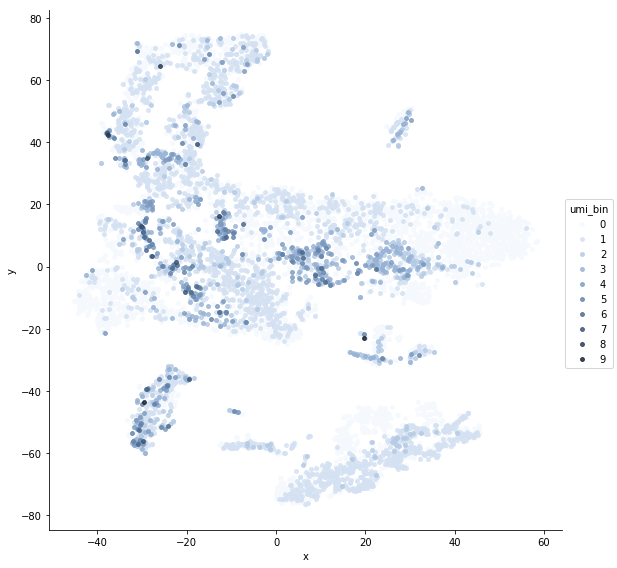

In [53]:
sns.lmplot('x','y',tsne_df, hue = 'umi_bin', fit_reg=False, 
              scatter_kws={"s":15}, size=8, palette = g_color)
plt.title("")